In [1]:
#04.10
random_state = 16

# Imports

In [2]:
!pip install scikit-learn xgboost  tune-sklearn


In [3]:
!pip install pandas numpy seaborn matplotlib yellowbrick scipy

In [4]:
#imports
from sklearn.ensemble import BaggingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt    
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.style import set_palette
from yellowbrick.style import rcmod
from sklearn.feature_selection import SelectFromModel

# Parameters

In [5]:
num=list(np.logspace(-2, 1, num = 20))
max=1
etas = list(filter(lambda x: x <= max, num))
etas

[0.01,
 0.01438449888287663,
 0.0206913808111479,
 0.029763514416313176,
 0.04281332398719394,
 0.06158482110660264,
 0.08858667904100823,
 0.12742749857031335,
 0.18329807108324356,
 0.26366508987303583,
 0.37926901907322497,
 0.5455594781168517,
 0.7847599703514611]

In [6]:
param_xgb2 = {
    "max_depth" : range(1, 6),
    "eta" : etas
}

In [7]:
parameters_dtc = {
    'max_depth':range(1, 15),
}

In [8]:
parameters_knr = {
    'n_neighbors':range(1, 80),
}

In [9]:
parameters_enet = {
    "alpha" : np.delete(np.linspace(0, 1, 200), 0)
}

# Data

In [10]:
train = pd.read_csv("esm_train_1280.csv", index_col = 0)
train.head()

,Protein_ID,Tm_C,0,1,2,3,4,5,6,7,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,P00350,57.83,0.061456,-0.018783,-0.010231,0.061477,-0.026708,-0.001284,0.066149,-0.251243,...,0.003973,-0.101666,-0.036435,-0.049548,-0.001934,0.003177,0.043629,-0.133913,0.007773,0.049505
1,P00363,46.77,0.034969,0.042067,0.013021,-0.032451,-0.087499,-0.042588,0.037960,-0.183190,...,-0.032316,-0.082484,-0.027231,-0.032674,-0.032110,0.050828,0.059285,-0.132150,0.012745,0.077547
2,P00370,58.78,0.053757,-0.021765,-0.029727,0.024891,-0.024003,-0.017309,0.041215,-0.213883,...,-0.009158,-0.060221,-0.066123,-0.024452,0.011502,0.016854,0.007332,-0.101124,-0.010835,0.105137
3,P00448,66.59,-0.026329,-0.123985,-0.002493,0.070453,-0.023620,-0.072184,0.017002,-0.184937,...,0.020440,-0.048012,-0.023534,0.022797,-0.054544,-0.051367,0.041085,-0.204482,-0.001493,0.067742
5,P00490,47.89,0.010293,-0.059319,-0.064765,0.008851,-0.096821,-0.024146,0.027961,-0.113776,...,-0.006825,-0.046164,-0.100880,-0.018914,-0.023522,0.016062,0.027163,-0.199782,-0.008798,0.161164


In [11]:
test = pd.read_csv("esm_test_1280.csv", index_col = 0)
test.head()

,Protein_ID,Tm_C,0,1,2,3,4,5,6,7,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
4,P00452,44.79,-0.030523,-0.028832,0.017711,0.119092,-0.099517,0.040022,0.028322,-0.127345,...,0.140361,-0.007807,-0.133724,0.026237,-0.004347,0.040577,-0.003302,-0.161196,-0.032264,0.173568
16,P00895,46.49,-0.017417,-0.010529,0.028629,0.017736,-0.102040,-0.032673,0.034530,-0.061171,...,0.054166,-0.071133,-0.157430,0.061561,-0.078844,-0.015816,0.054790,-0.141735,-0.027016,0.081756
18,P00909,44.71,0.048733,-0.078694,-0.018904,0.008294,-0.056692,-0.021930,0.057865,-0.156708,...,0.067025,-0.049149,-0.103326,-0.013025,-0.069809,-0.056671,0.127321,-0.147841,0.029756,0.095406
19,P00934,48.48,0.008325,-0.088589,0.024109,0.075197,-0.097268,-0.003867,0.104619,-0.139509,...,0.008444,-0.037444,-0.109918,-0.004216,-0.058337,-0.072301,0.039237,-0.203126,-0.055722,0.149343
21,P00946,49.10,0.031946,-0.118324,0.012960,0.085051,-0.082697,0.003132,0.076346,-0.106143,...,0.057211,-0.058940,-0.128933,-0.024187,-0.039388,-0.060909,0.029982,-0.242910,-0.001270,0.140671


In [12]:
groups = pd.read_csv("esm_groups_1280.csv", index_col = 0)
groups.head()

,cluster#
0,3092
1,0
2,1
3,734
5,1396


In [13]:
X_train = train.drop(columns=['Tm_C', 'Protein_ID'])
y_train = train['Tm_C']
X_test = test.drop(columns=['Tm_C', 'Protein_ID'])
y_test = test['Tm_C']

In [14]:
X_train.shape, X_test.shape

((5338, 1280), (1334, 1280))

In [15]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.061456,-0.018783,-0.010231,0.061477,-0.026708,-0.001284,0.066149,-0.251243,0.005818,-0.014427,...,0.003973,-0.101666,-0.036435,-0.049548,-0.001934,0.003177,0.043629,-0.133913,0.007773,0.049505
1,0.034969,0.042067,0.013021,-0.032451,-0.087499,-0.042588,0.037960,-0.183190,0.015454,0.000416,...,-0.032316,-0.082484,-0.027231,-0.032674,-0.032110,0.050828,0.059285,-0.132150,0.012745,0.077547
2,0.053757,-0.021765,-0.029727,0.024891,-0.024003,-0.017309,0.041215,-0.213883,0.076203,-0.048736,...,-0.009158,-0.060221,-0.066123,-0.024452,0.011502,0.016854,0.007332,-0.101124,-0.010835,0.105137
3,-0.026329,-0.123985,-0.002493,0.070453,-0.023620,-0.072184,0.017002,-0.184937,0.052806,0.059320,...,0.020440,-0.048012,-0.023534,0.022797,-0.054544,-0.051367,0.041085,-0.204482,-0.001493,0.067742
5,0.010293,-0.059319,-0.064765,0.008851,-0.096821,-0.024146,0.027961,-0.113776,-0.055357,0.007494,...,-0.006825,-0.046164,-0.100880,-0.018914,-0.023522,0.016062,0.027163,-0.199782,-0.008798,0.161164


# Feature Preselection
## Finding Correlation


In [16]:
corrs = {}
for i in X_train.columns:
    corr = y_train.corr(X_train[i])
    corrs[i] = corr

In [46]:
#dict(sorted(corrs.items(), key=lambda item: item[1], reverse=True))

## Elastic Net

In [16]:
#[0.001,0.01, 0.02, 0.03, 0.05,0.08, 0.1, 0.12, 0.15, 0.18, 0.2, 0.22, 0.24, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1]
enet = ElasticNet(random_state=random_state)
gs_enet = GridSearchCV(enet, parameters_enet, scoring = ['neg_mean_squared_error'], refit = 'neg_mean_squared_error', cv = GroupKFold(n_splits=5), return_train_score=True, n_jobs=-1)
gs_enet.fit(X_train, y_train, groups = groups)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.874e+02, tolerance: 6.831e+01
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.567e+02, tolerance: 6.701e+01
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.482e+02, tolerance: 6.739e

GridSearchCV(cv=GroupKFold(n_splits=5), estimator=ElasticNet(random_state=16),
             n_jobs=-1,
             param_grid={'alpha': array([0.00502513, 0.01005025, 0.01507538, 0.0201005 , 0.02512563,
       0.03015075, 0.03517588, 0.04020101, 0.04522613, 0.05025126,
       0.05527638, 0.06030151, 0.06532663, 0.07035176, 0.07537688,
       0.08040201, 0.08542714, 0.09045226, 0.09547739, 0.10050251,
       0.10552764, 0.1105...
       0.85929648, 0.86432161, 0.86934673, 0.87437186, 0.87939698,
       0.88442211, 0.88944724, 0.89447236, 0.89949749, 0.90452261,
       0.90954774, 0.91457286, 0.91959799, 0.92462312, 0.92964824,
       0.93467337, 0.93969849, 0.94472362, 0.94974874, 0.95477387,
       0.95979899, 0.96482412, 0.96984925, 0.97487437, 0.9798995 ,
       0.98492462, 0.98994975, 0.99497487, 1.        ])},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring=['neg_mean_squared_error'])

In [17]:
enet = gs_enet.best_estimator_
enet.fit(X_train, y_train)

y_pred_train = enet.predict(X_train)
print("elastic train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train,y_pred_train,  squared = False),
                                                 r2_score(y_train, y_pred_train), pearsonr(y_train,y_pred_train)))
y_test_enet = enet.predict(X_test)
print("elastic test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_test_enet, squared = False),
                                                r2_score(y_test, y_test_enet), pearsonr(y_test, y_test_enet)))

elastic train RMSE: 7.075855034573052, R2: 0.6830048831512419, PCC: PearsonRResult(statistic=0.8272633168086967, pvalue=0.0)
elastic test RMSE: 7.3161910525141405, R2: 0.6559416711711616, PCC: PearsonRResult(statistic=0.8104546062903288, pvalue=1.186562264721e-311)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.187e+02, tolerance: 8.431e+01
  model = cd_fast.enet_coordinate_descent(


In [18]:
print(gs_enet.best_estimator_)

ElasticNet(alpha=0.005025125628140704, random_state=16)


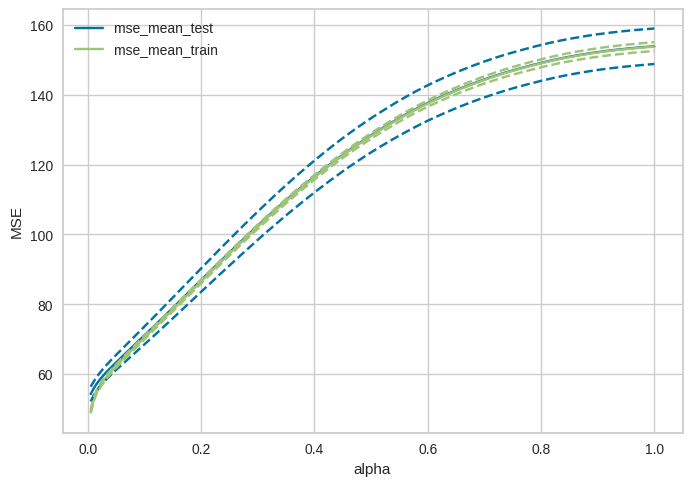

In [19]:
scores_mean_test = gs_enet.cv_results_['mean_test_neg_mean_squared_error']*-1
scores_mean_train = gs_enet.cv_results_['mean_train_neg_mean_squared_error']*-1
scores_std_test = gs_enet.cv_results_['std_test_neg_mean_squared_error']*-1
scores_std_train = gs_enet.cv_results_['std_train_neg_mean_squared_error']*-1
range_depth = parameters_enet['alpha']

plt.figure()
plt.plot(range_depth, scores_mean_test, 'b')
plt.plot(range_depth, scores_mean_train, 'g')

plt.plot(range_depth, scores_mean_test + scores_std_test, 'b--')
plt.plot(range_depth, scores_mean_test - scores_std_test, 'b--')

plt.plot(range_depth, scores_mean_train + scores_std_train, 'g--')
plt.plot(range_depth, scores_mean_train - scores_std_train, 'g--')

plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend(['mse_mean_test', 'mse_mean_train'], loc = 'upper left')
plt.show()


## Optimal alpha

In [17]:
alphas = np.delete(np.linspace(0, 1, 200), 0)

non_zero_count = []
zero_count = []
for i in alphas:
    enet = ElasticNet(alpha=i,random_state=random_state)
    enet.fit(X_train, y_train)
    pred = enet.predict(X_test)
    arr = np.array(enet.coef_)
    non_zero = np.count_nonzero(arr)
    zero = len(arr) - np.count_nonzero(arr)
    non_zero_count.append(non_zero)
    zero_count.append(zero)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.187e+02, tolerance: 8.431e+01
  model = cd_fast.enet_coordinate_descent(


In [18]:
alphas[:15]

array([0.00502513, 0.01005025, 0.01507538, 0.0201005 , 0.02512563,
       0.03015075, 0.03517588, 0.04020101, 0.04522613, 0.05025126,
       0.05527638, 0.06030151, 0.06532663, 0.07035176, 0.07537688])

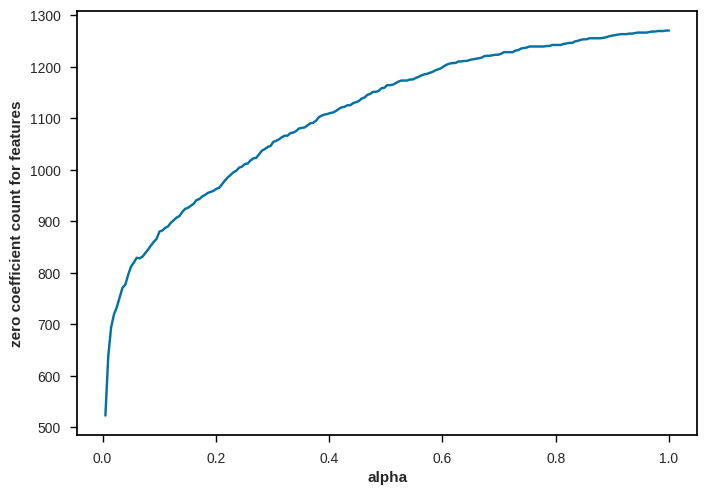

In [19]:
plt.rcParams["axes.edgecolor"] = 'black'
plt.grid(False)


plt.tick_params(axis="x", direction="out", length = 5, color = 'black')
plt.tick_params(axis="y", direction="out", length = 5, color = 'black')

plt.plot(alphas, zero_count, 'b')

plt.xlabel('alpha', fontweight='bold')
plt.ylabel('zero coefficient count for features', fontweight='bold')
plt.savefig('EN_esm_P2.png')
plt.show()

In [23]:
enet = ElasticNet(alpha=0.00502513, random_state=random_state)
enet.fit(X_train, y_train)
arr = np.array(enet.coef_)

d = {'col1':arr, 'col2':X_train.columns}
coef = pd.DataFrame(data = d)
coef

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.187e+02, tolerance: 8.431e+01
  model = cd_fast.enet_coordinate_descent(


,col1,col2
0,0.238969,0
1,-0.288468,1
2,-0.862323,2
3,-1.079376,3
4,-0.562670,4
...,...,...
1275,0.000000,1275
1276,-0.000000,1276
1277,0.591128,1277
1278,0.000000,1278


In [24]:
predicted_train = enet.predict(X_train)
predicted_test = enet.predict(X_test)
print("EN train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train, predicted_train, squared=False),
                                           r2_score(y_train, predicted_train), pearsonr(y_train, predicted_train)))
print("EN test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, predicted_test, squared = False),
                                                r2_score(y_test, predicted_test), pearsonr(y_test, predicted_test)))

EN train RMSE: 7.075855309203708, R2: 0.6830048585445823, PCC: PearsonRResult(statistic=0.8272633023242522, pvalue=0.0)
EN test RMSE: 7.316191155074521, R2: 0.6559416615249527, PCC: PearsonRResult(statistic=0.8104546008837854, pvalue=1.186582453771e-311)


In [25]:
coef_0 = coef.loc[coef['col1'] == 0]
zero_features = coef_0['col2']
zero_features


6          6
8          8
9          9
11        11
14        14
        ... 
1272    1272
1275    1275
1276    1276
1278    1278
1279    1279
Name: col2, Length: 523, dtype: object

In [26]:
zero_features.to_csv("zero_features_1280.csv", index = False)

In [20]:
zero_features = pd.read_csv("zero_features_1280.csv")
zero_features.head()

,col2
0,6
1,8
2,9
3,11
4,14


In [21]:
zero_features.shape

(523, 1)

In [22]:
zero_features = zero_features['col2'].to_list()

In [23]:
X_train = X_train.drop(columns=X_train.columns[zero_features], axis = 1)
X_test = X_test.drop(columns=X_test.columns[zero_features], axis = 1)
X_train.shape, X_test.shape

((5338, 757), (1334, 757))

# Decision Tree

In [24]:
dtc = DecisionTreeRegressor(random_state=random_state)
grid_dtc = GridSearchCV(dtc, parameters_dtc, scoring=['neg_root_mean_squared_error'], refit='neg_root_mean_squared_error', cv=GroupKFold(n_splits = 5),
                    return_train_score=True, n_jobs=-1, error_score='raise')
grid_dtc.fit(X_train, y_train, groups = groups)
print(grid_dtc.best_estimator_)

DecisionTreeRegressor(max_depth=4, random_state=16)


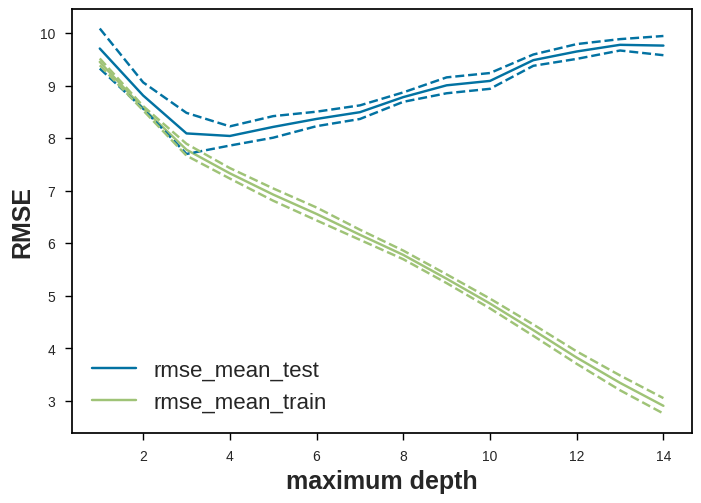

In [26]:
scores_mean_test = grid_dtc.cv_results_['mean_test_neg_root_mean_squared_error']*-1
scores_mean_train = grid_dtc.cv_results_['mean_train_neg_root_mean_squared_error']*-1
scores_std_test = grid_dtc.cv_results_['std_test_neg_root_mean_squared_error']*-1
scores_std_train = grid_dtc.cv_results_['std_train_neg_root_mean_squared_error']*-1
range_depth = parameters_dtc['max_depth']


plt.figure()

plt.rcParams["axes.edgecolor"] = 'black'
plt.grid(False)
plt.tick_params(axis="x", direction="out", length = 5, color = 'black')
plt.tick_params(axis="y", direction="out", length = 5, color = 'black')

plt.plot(range_depth, scores_mean_test, 'b')
plt.plot(range_depth, scores_mean_train, 'g')


plt.plot(range_depth, scores_mean_test + scores_std_test, 'b--')
plt.plot(range_depth, scores_mean_test - scores_std_test, 'b--')

plt.plot(range_depth, scores_mean_train + scores_std_train, 'g--')
plt.plot(range_depth, scores_mean_train - scores_std_train, 'g--')

plt.xlabel('maximum depth', fontweight='bold', fontsize=18)
plt.ylabel('RMSE', fontweight='bold', fontsize=18)
plt.legend(['rmse_mean_test', 'rmse_mean_train'], loc = 'lower left', fontsize=16)
plt.savefig('DTC_esm_P2.png')
plt.show()

In [23]:
dtc = grid_dtc.best_estimator_
dtc.fit(X_train, y_train)

y_pred_train = dtc.predict(X_train)
print("decision train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train,y_pred_train,  squared = False),
                                                 r2_score(y_train, y_pred_train), pearsonr(y_train, y_pred_train)))
y_pred_test = dtc.predict(X_test)
print("decision test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_pred_test, squared = False),
                                                r2_score(y_test, y_pred_test), pearsonr(y_test, y_pred_test)))

decision train RMSE: 7.333722794563197, R2: 0.6594791577572898, PCC: PearsonRResult(statistic=0.8120832209553955, pvalue=0.0)
decision test RMSE: 7.994650858835929, R2: 0.5891710839105573, PCC: PearsonRResult(statistic=0.7686196948256091, pvalue=1.0461487190553896e-260)


# KNN

In [27]:
knr = KNeighborsRegressor()
grid_knr = GridSearchCV(knr, parameters_knr, scoring = ['neg_root_mean_squared_error'], refit = 'neg_root_mean_squared_error', cv = GroupKFold(n_splits=5), return_train_score=True, n_jobs=-1, error_score='raise')
grid_knr.fit(X_train, y_train, groups = groups)
print(grid_knr.best_estimator_)

KNeighborsRegressor(n_neighbors=20)


In [28]:
knr = grid_knr.best_estimator_
knr.fit(X_train, y_train)

y_pred_train = knr.predict(X_train)
print("knr train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train,y_pred_train,  squared = False),
                                                 r2_score(y_train, y_pred_train), pearsonr(y_train, y_pred_train)))
y_pred_test = knr.predict(X_test)
print("knr test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_pred_test, squared = False),
                                                r2_score(y_test, y_pred_test), pearsonr(y_test, y_pred_test)))

knr train RMSE: 6.6802681475123356, R2: 0.717458328815058, PCC: PearsonRResult(statistic=0.849157273969828, pvalue=0.0)
knr test RMSE: 7.078028389136455, R2: 0.6779772162209226, PCC: PearsonRResult(statistic=0.8256616367285676, pvalue=0.0)


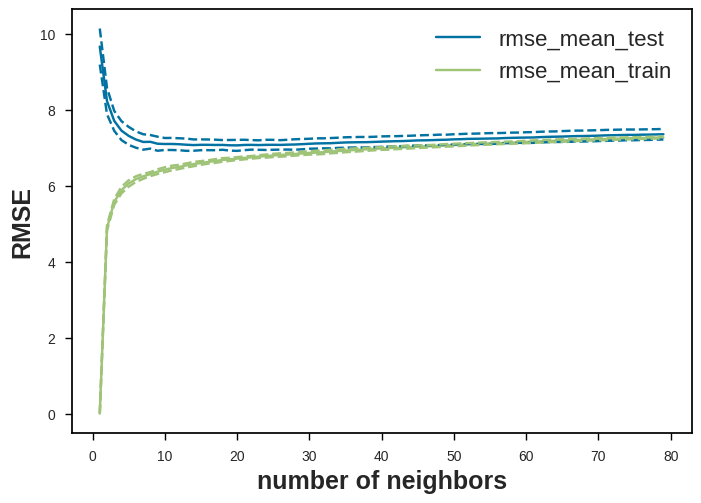

In [29]:
scores_mean_test = grid_knr.cv_results_['mean_test_neg_root_mean_squared_error']*-1
scores_mean_train = grid_knr.cv_results_['mean_train_neg_root_mean_squared_error']*-1
scores_std_test = grid_knr.cv_results_['std_test_neg_root_mean_squared_error']*-1
scores_std_train = grid_knr.cv_results_['std_train_neg_root_mean_squared_error']*-1
range_depth = parameters_knr['n_neighbors']

plt.figure()

plt.rcParams["axes.edgecolor"] = 'black'
plt.grid(False)
plt.tick_params(axis="x", direction="out", length = 5, color = 'black')
plt.tick_params(axis="y", direction="out", length = 5, color = 'black')

plt.plot(range_depth, scores_mean_test, 'b')
plt.plot(range_depth, scores_mean_train, 'g')

plt.plot(range_depth, scores_mean_test + scores_std_test, 'b--')
plt.plot(range_depth, scores_mean_test - scores_std_test, 'b--')

plt.plot(range_depth, scores_mean_train + scores_std_train, 'g--')
plt.plot(range_depth, scores_mean_train - scores_std_train, 'g--')

plt.xlabel('number of neighbors', fontweight='bold', fontsize = 18)
plt.ylabel('RMSE', fontweight='bold',  fontsize = 18)
plt.legend(['rmse_mean_test', 'rmse_mean_train'], loc = 'upper right',  fontsize = 16)
plt.savefig('KNN_esm_P2.png')

plt.show()

# MLPRegression

In [19]:
mlpr = make_pipeline(
    MinMaxScaler(),
    MLPRegressor(
        hidden_layer_sizes=(64, 32), early_stopping=True, random_state=random_state, max_iter = 500
    ),
)
bag = BaggingRegressor(estimator=mlpr, n_estimators=20, random_state=random_state)
bag.fit(X_train, y_train)

y_pred_train = bag.predict(X_train)
print("mlpr train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train, y_pred_train, squared=False),
                                             r2_score(y_train, y_pred_train), pearsonr(y_train, y_pred_train)))

y_pred_test = bag.predict(X_test)
print("mlpr test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_pred_test, squared=False),
                                            r2_score(y_test, y_pred_test), pearsonr(y_test, y_pred_test)))

mlpr train RMSE: 6.370904168217662, R2: 0.7430214564060056, PCC: PearsonRResult(statistic=0.8621249450861821, pvalue=0.0)
mlpr test RMSE: 6.847523110640492, R2: 0.6986098789178969, PCC: PearsonRResult(statistic=0.8358476083042028, pvalue=0.0)


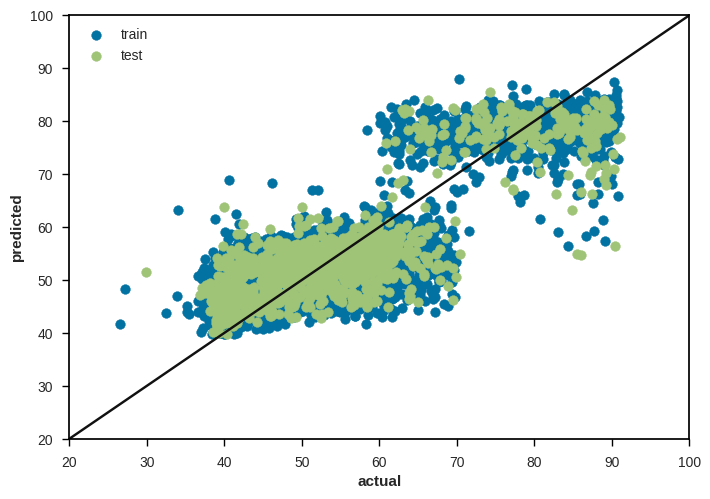

In [20]:
x = np.linspace(0, 100, 110)
plt.rcParams["axes.edgecolor"] = 'black'
#plt.axis('equal')
plt.xlim(20,100)
plt.ylim(20,100)
plt.grid(False)

plt.ylabel('predicted', fontweight='bold')
plt.xlabel('actual', fontweight='bold')
plt.plot(x,x,'k-') # identity line
plt.scatter(y_train, y_pred_train, label = 'train')
plt.scatter(y_test, y_pred_test, label = 'test')

plt.tick_params(axis="x", direction="out", length = 5, color = 'black')
plt.tick_params(axis="y", direction="out", length = 5, color = 'black')
plt.legend()
plt.savefig('mlp_esm_2.png')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


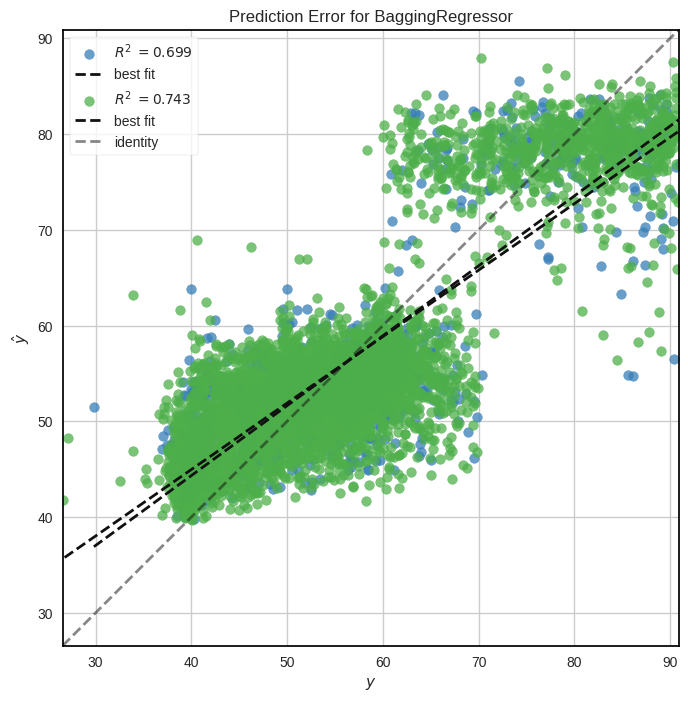

<Axes: title={'center': 'Prediction Error for BaggingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [21]:
visualizer = PredictionError(bag, size = (800, 800)) 
# fit visualizer on training data
set_palette('bold')
visualizer.fit(X_train, y_train) 
#Evaluate on test data
visualizer.score(X_test, y_test)
visualizer.score(X_train, y_train)

visualizer.show()

# XGBoost

In [27]:
rs = RandomizedSearchCV(
    XGBRegressor(random_state=random_state), 
    param_xgb2, 
    cv=GroupKFold(n_splits=5),
    scoring="neg_root_mean_squared_error", 
    refit = "neg_root_mean_squared_error", 
    n_iter = 100,
    return_train_score=True, 
    error_score='raise',
    n_jobs=-1
)
rs.fit(X_train, y_train, groups = groups)
print(rs.best_estimator_)
xgb = rs.best_estimator_
#xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
print("xgbregressor train RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_train,y_pred_train,  squared = False),
                                                    r2_score(y_train, y_pred_train), pearsonr(y_train,y_pred_train)))
y_pred_test = xgb.predict(X_test)
print("xgbregressor test RMSE: {0}, R2: {1}, PCC: {2}".format(mean_squared_error(y_test, y_pred_test, squared = False),
                                            r2_score(y_test, y_pred_test), pearsonr(y_test, y_pred_test)))



/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 65 is smaller than n_iter=100. Running 65 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.08858667904100823,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)
xgbregressor train RMSE: 3.8968790172102743, R2: 0.90385458810585, PCC: PearsonRResult(statistic=0.9533359936723506, pvalue=0.0)
xgbregressor test RMSE: 7.156420491741723, R2: 0.670804643340458, PCC: PearsonRResult(statistic=0.8191192590674569

In [28]:
with open("esm_p2_xgb.txt", 'w') as f: 
    for key, value in rs.cv_results_.items(): 
        f.write('%s:%s\n' % (key, value))

In [29]:
np.mean(rs.cv_results_['mean_test_score']), np.mean(rs.cv_results_['mean_train_score'])

(-9.467713810736845, -7.3546112072483005)